
--- Rule-Based Extraction ---
Extracted: Diabetes
Extracted: Hypertension
Extracted: Asthma with mild wheezing
Extracted: No disease
Extracted: High Blood Pressure detected
Extracted: Gastritis

--- Pattern-Based Extraction ---
Pattern Matches: ['Diabetes Severe headache and fatigue', 'Hypertension Diagnosis', 'No disease Diagnosis', 'Gastritis']

--- Model Accuracy ---
Naive Bayes Accuracy: 0.0
SVM Accuracy: 0.0
Random Forest Accuracy: 0.0


C:\Users\Aneesh Mada\AppData\Local\Temp\ipykernel_38504\121743353.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='pastel')


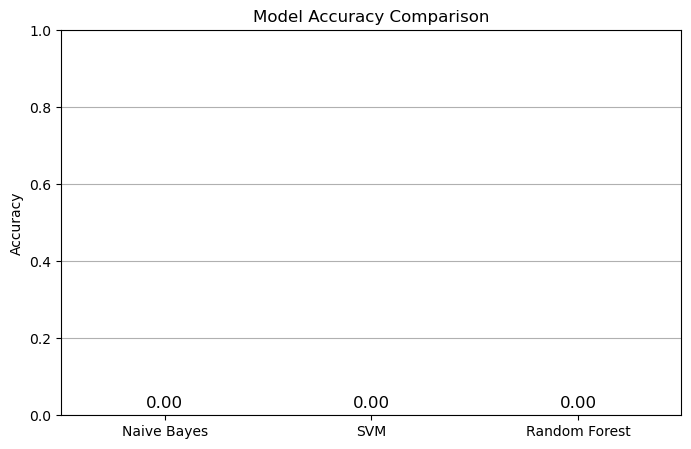

In [8]:
# Import Libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Sample Clinical Text Data
data = {
    "text": [
        "Patient shows symptoms. Diagnosis: Diabetes",
        "Severe headache and fatigue. Diagnosis: Hypertension",
        "Diagnosis: Asthma with mild wheezing",
        "Normal vitals observed. Diagnosis: No disease",
        "Diagnosis: High Blood Pressure detected",
        "Fatigue and vomiting. Diagnosis: Gastritis"
    ],
    "label": ["Diabetes", "Hypertension", "Asthma", "No disease", "High Blood Pressure", "Gastritis"]
}
df = pd.DataFrame(data)

# --- Rule-Based Extraction ---
print("\n--- Rule-Based Extraction ---")
for text in df["text"]:
    match = re.search(r"Diagnosis: ([\w\s]+)", text)
    if match:
        print(f"Extracted: {match.group(1)}")

# --- Pattern-Based Extraction ---
print("\n--- Pattern-Based Extraction ---")
pattern_results = re.findall(r"Diagnosis: ([\w\s]+)", " ".join(df["text"]))
print("Pattern Matches:", pattern_results)

# --- Machine Learning-Based Extraction ---

# Text Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])
y = df["label"]

# Split into Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print Accuracy Scores
print("\n--- Model Accuracy ---")
print("Naive Bayes Accuracy:", acc_nb)
print("SVM Accuracy:", acc_svm)
print("Random Forest Accuracy:", acc_rf)

# --- Plot Accuracy Comparison ---
model_names = ["Naive Bayes", "SVM", "Random Forest"]
accuracies = [acc_nb, acc_svm, acc_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='pastel')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)
plt.grid(True, axis='y')
plt.show()
